In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import math
from collections import Counter

# Viz libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

C:\Users\Saksham\Anaconda3\lib\site-packages\mpl_toolkits\axes_grid\__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [4]:
df = df.drop(['phone', 'menu_item', 'dish_liked'], axis = 1)

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(51717, 14)

In [6]:
def cleanrate(value):
    if (value== 'NEW'or value== '-'):
        return np.nan
    else:
        value= str(value).split('/')
        value= value[0]
        return float(value)
df['rate']= df['rate'].apply(cleanrate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [7]:
df.isna
df.dropna(inplace= True)

In [8]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [9]:
df.rename(columns= {'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type'}, inplace= True)
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [10]:
def cleancost(value):
    value= str(value)
    if ',' in value:
        value= value.replace(',', '')
        return float(value)
    else:
        return float(value)
df['cost']= df['cost'].apply(cleancost)
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

Text(0, 0.5, ' ')

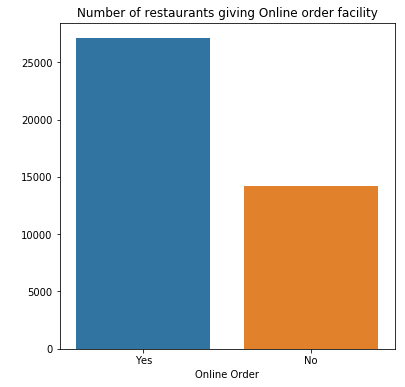

In [11]:
plt.figure(figsize=(6,6))
count_online_order_feature= sns.countplot(df['online_order'])
plt.title("Number of restaurants giving Online order facility")
plt.xlabel("Online Order")
plt.ylabel(" ")

Text(0, 0.5, ' ')

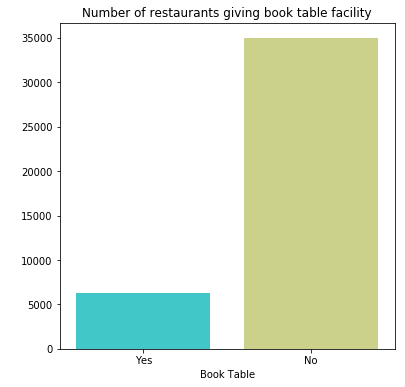

In [12]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')
plt.title("Number of restaurants giving book table facility")
plt.xlabel("Book Table")
plt.ylabel(" ")

Text(0.5, 1.0, 'Distribution of rating on the basis of Online Order facility')

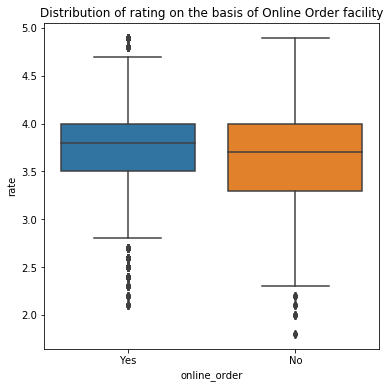

In [13]:
plt.figure(figsize= (6,6))
sns.boxplot(x= 'online_order', y= 'rate', data= df)
plt.title("Distribution of rating on the basis of Online Order facility")

Text(0.5, 1.0, 'Range for Cost for 2 pax on the basis of online order facility')

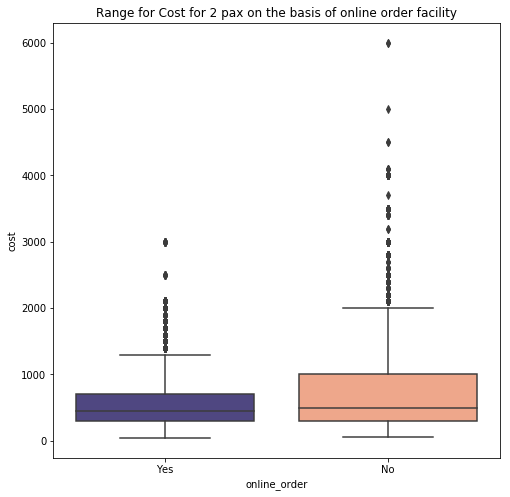

In [14]:
plt.figure(figsize= (8,8))
sns.boxplot(x='online_order', y='cost', data=df, palette=['darkslateblue', 'lightsalmon'])
plt.title("Range for Cost for 2 pax on the basis of online order facility")

Text(0.5, 1.0, 'Distribution of rating on the basis of Book Table facility')

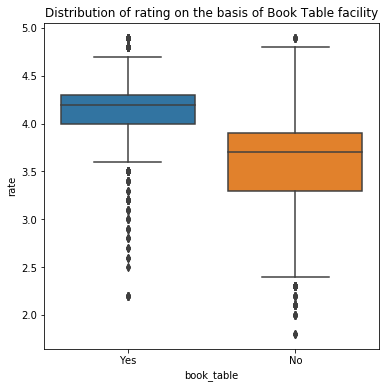

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)
plt.title("Distribution of rating on the basis of Book Table facility")

Text(0.5, 1.0, 'Range for Cost for 2 pax on the basis of book table facility')

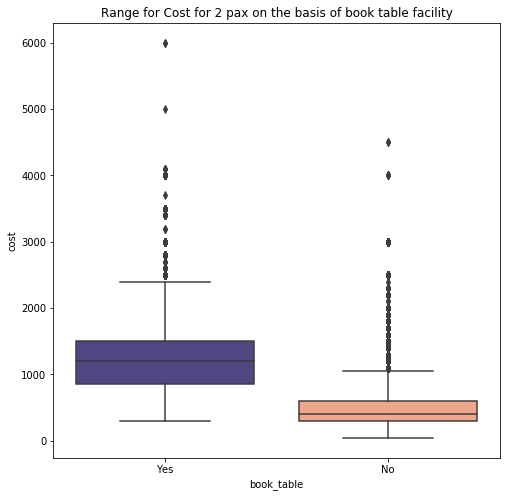

In [16]:
plt.figure(figsize= (8,8))
sns.boxplot(x='book_table', y='cost', data=df, palette=['darkslateblue', 'lightsalmon'])
plt.title("Range for Cost for 2 pax on the basis of book table facility")

Text(0.5, 1.0, 'Double bar plot for the count of restaurants providing online order facultiy location wise')

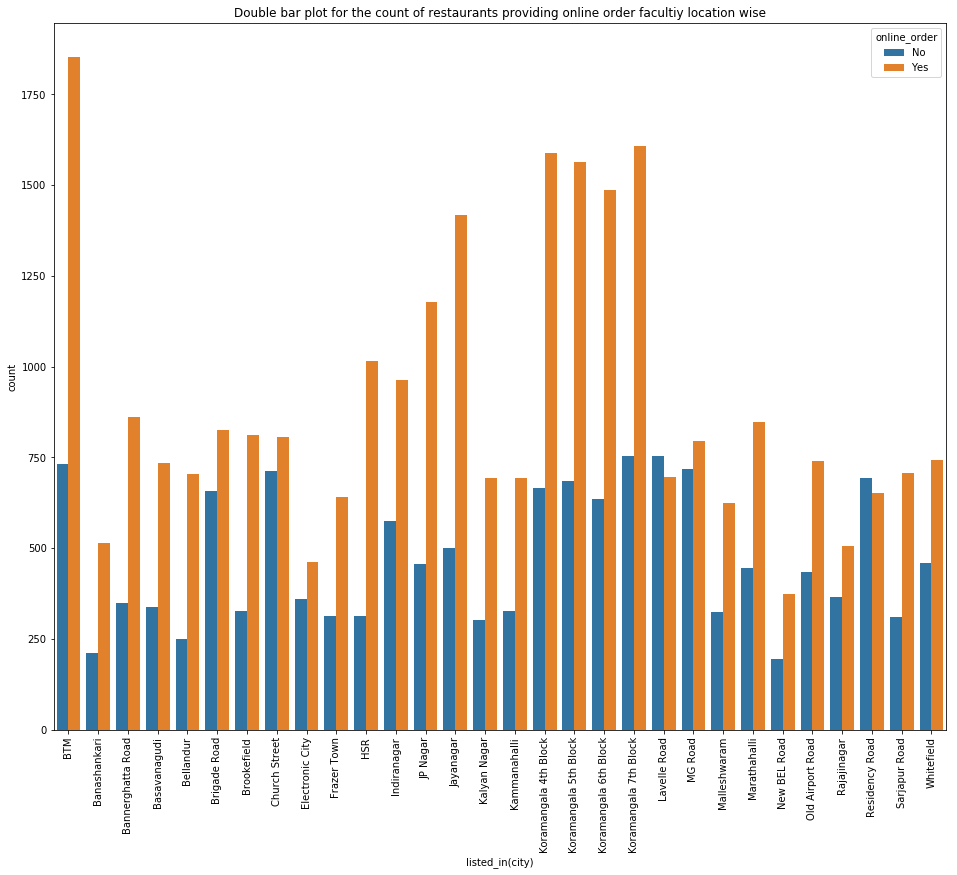

In [17]:
df1 = df.groupby(['listed_in(city)','online_order'])['name'].count().reset_index(name ='count')
plt.figure(figsize= (16,13))
sns.barplot(x="listed_in(city)", y="count", hue="online_order", data=df1)
plt.xticks(rotation= 90)
plt.title("Double bar plot for the count of restaurants providing online order facultiy location wise")

Text(0.5, 1.0, 'Double bar plot for the count of restaurants providing book table facultiy location wise')

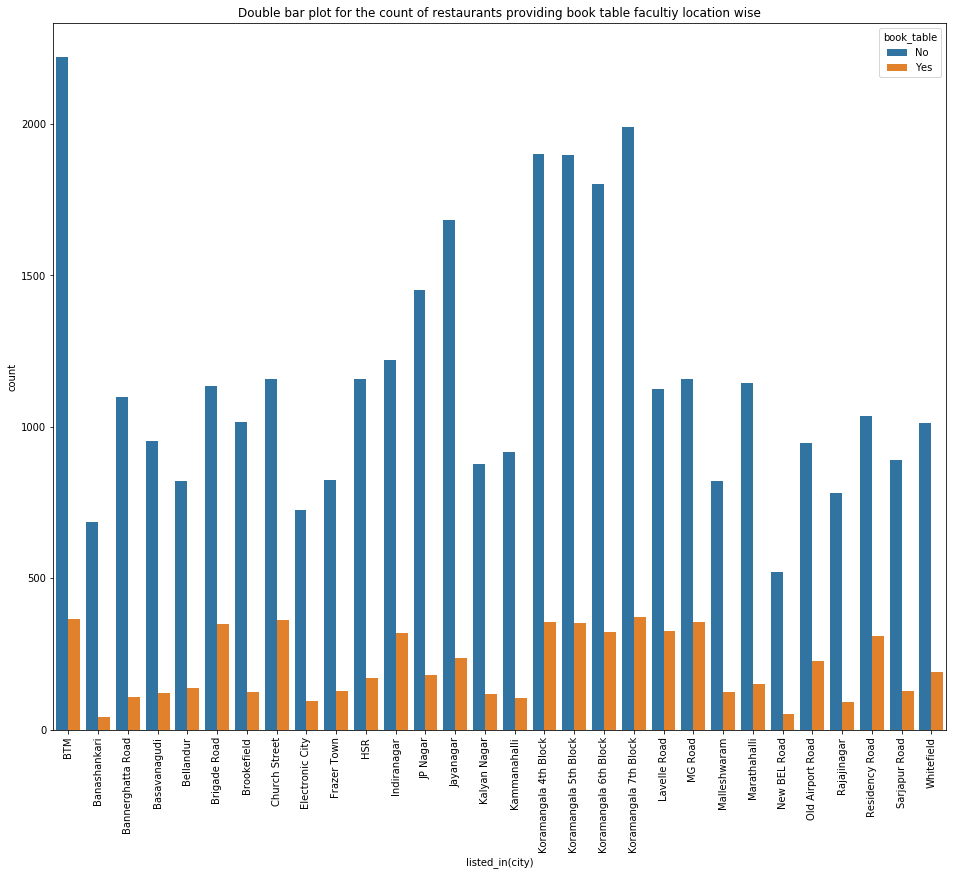

In [18]:
df2 = df.groupby(['listed_in(city)','book_table'])['name'].count().reset_index(name ='count')
plt.figure(figsize= (16,13))
sns.barplot(x="listed_in(city)", y="count", hue="book_table", data=df2)
plt.xticks(rotation= 90)
plt.title("Double bar plot for the count of restaurants providing book table facultiy location wise")

Text(0.5, 1.0, 'Double bar plot for the count of restaurants providing book table facultiy location wise')

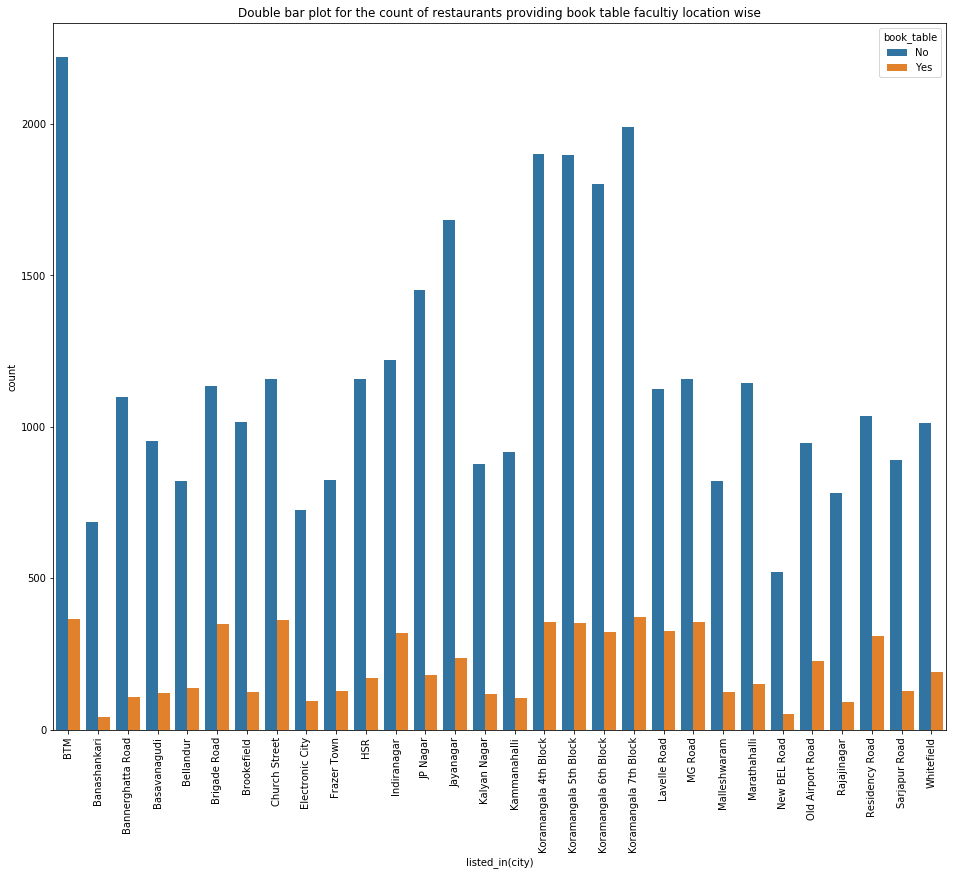

In [19]:
df2 = df.groupby(['listed_in(city)','book_table'])['name'].count().reset_index(name ='count')
plt.figure(figsize= (16,13))
sns.barplot(x="listed_in(city)", y="count", hue="book_table", data=df2)
plt.xticks(rotation= 90)
plt.title("Double bar plot for the count of restaurants providing book table facultiy location wise")

In [20]:
popular_franchises = df.groupby(by='name', as_index=False).agg({'votes': 'sum',
                                                                            'url': 'count',
                                                                            'cost': 'mean',
                                                                            'rate': 'mean'})
popular_franchises.columns = ['name', 'total_votes', 'total_unities', 'mean_approx_cost', 'mean_rate_num']
popular_franchises['votes_per_unity'] = popular_franchises['total_votes'] / popular_franchises['total_unities']
popular_franchises = popular_franchises.sort_values(by='total_unities', ascending=False)
popular_franchises = popular_franchises.loc[:, ['name', 'total_unities', 'total_votes', 'votes_per_unity',
                                                'mean_approx_cost', 'mean_rate_num']]

# Correcting a restaurant name
bug_name = 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine'
popular_franchises['name'] = popular_franchises['name'].apply(lambda x: 'Santa Spa Cusisine' if x == bug_name else x)


popular_franchises.head(10)

,name,total_unities,total_votes,votes_per_unity,mean_approx_cost,mean_rate_num
987,Cafe Coffee Day,86,3089,35.918605,838.372093,3.256977
4191,Onesta,85,347520,4088.470588,600.000000,4.410588
1869,Empire Restaurant,69,229808,3330.550725,693.478261,4.030435
2978,Kanti Sweets,68,7336,107.882353,400.000000,3.898529
1975,Five Star Chicken,68,3134,46.088235,259.558824,3.425000
2848,Just Bake,67,2898,43.253731,400.000000,3.405970
596,Baskin Robbins,62,2487,40.112903,250.806452,3.572581
2892,KFC,60,23495,391.583333,422.500000,3.648333
4393,Pizza Hut,60,20161,336.016667,747.500000,3.376667
4371,Petoo,60,4242,70.700000,675.833333,3.833333


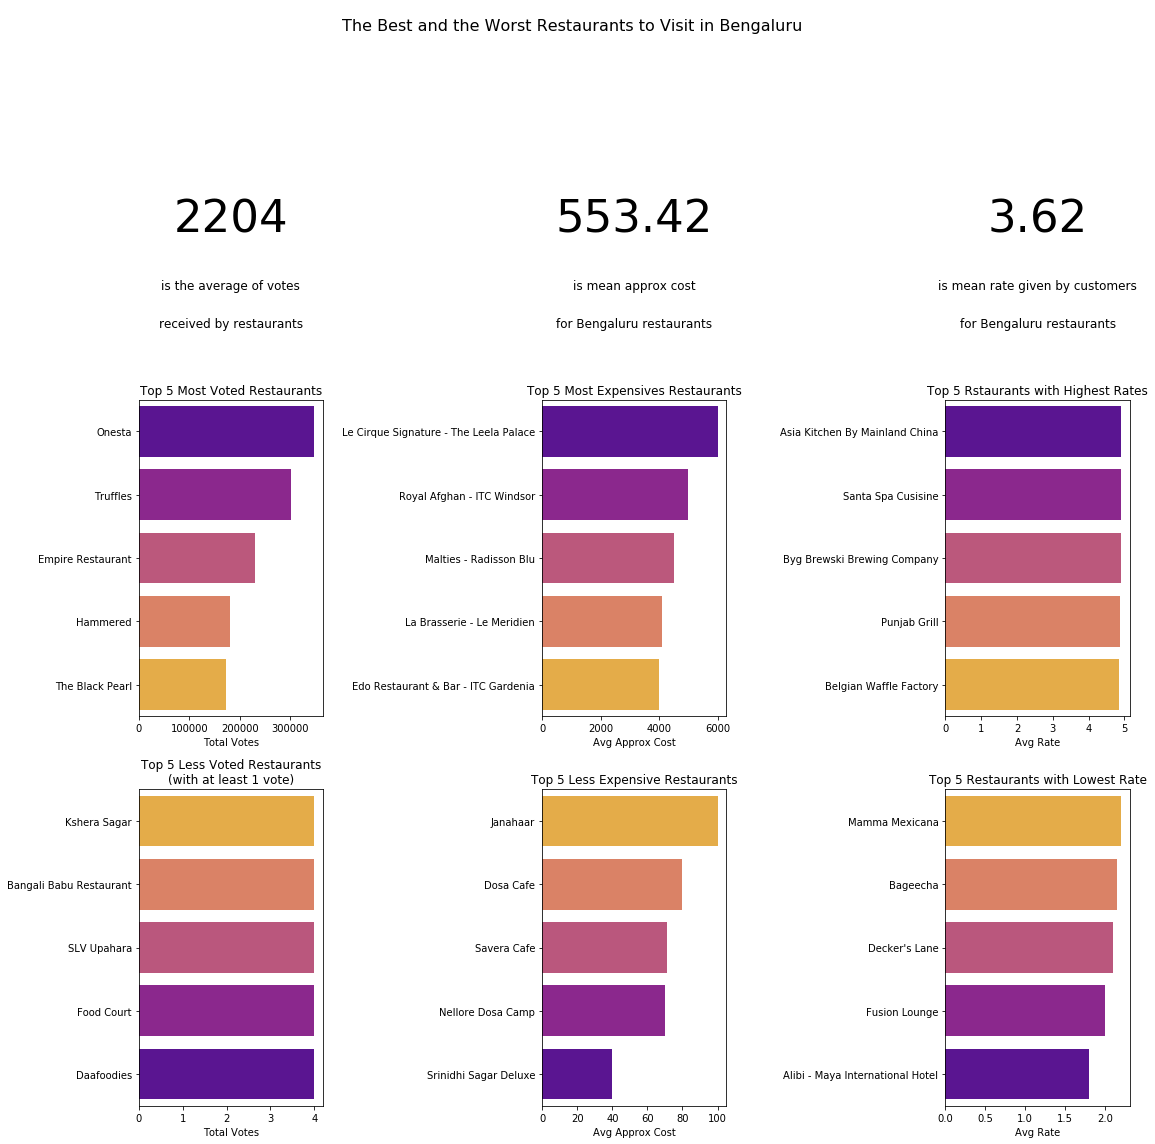

In [21]:
# Creating a figure por restaurants overview analysis
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

# Plot Pack 01 - Most popular restaurants (votes)
sns.barplot(x='total_votes', y='name', data=popular_franchises.sort_values(by='total_votes', ascending=False).head(),
            ax=axs[1, 0], palette='plasma')
axs[1, 0].set_title('Top 5 Most Voted Restaurants', size=12)
sns.barplot(x='total_votes', y='name', 
            data=popular_franchises.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),
            ax=axs[2, 0], palette='plasma_r')
axs[2, 0].set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Total Votes')
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, int(popular_franchises.total_votes.mean()), fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Cost analysis
sns.barplot(x='mean_approx_cost', y='name', 
            data=popular_franchises.sort_values(by='mean_approx_cost', ascending=False).head(),
            ax=axs[1, 1], palette='plasma')
axs[1, 1].set_title('Top 5 Most Expensives Restaurants', size=12)
sns.barplot(x='mean_approx_cost', y='name', 
            data=popular_franchises.sort_values(by='mean_approx_cost', ascending=False).query('mean_approx_cost > 0').tail(),
            ax=axs[2, 1], palette='plasma_r')
axs[2, 1].set_title('Top 5 Less Expensive Restaurants', size=12)
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Avg Approx Cost')
    
    ax.set_ylabel('')

# Annotations
axs[0, 1].text(0.50, 0.30, round(popular_franchises.mean_approx_cost.mean(), 2), fontsize=45, ha='center')
axs[0, 1].text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
axs[0, 1].axis('off')

# Plot Pack 03 - Rate analysis
sns.barplot(x='mean_rate_num', y='name', data=popular_franchises.sort_values(by='mean_rate_num', ascending=False).head(),
            ax=axs[1, 2], palette='plasma')
axs[1, 2].set_title('Top 5 Rstaurants with Highest Rates', size=12)
sns.barplot(x='mean_rate_num', y='name', 
            data=popular_franchises.sort_values(by='mean_rate_num', ascending=False).query('mean_rate_num > 0').tail(),
            ax=axs[2, 2], palette='plasma_r')
axs[2, 2].set_title('Top 5 Restaurants with Lowest Rate', size=12)
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Avg Rate')
    
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.50, 0.30, round(popular_franchises.mean_rate_num.mean(), 2), fontsize=45, ha='center')
axs[0, 2].text(0.50, 0.12, 'is mean rate given by customers', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
axs[0, 2].axis('off')

plt.tight_layout()
plt.suptitle('The Best and the Worst Restaurants to Visit in Bengaluru', size=16)
plt.show()

In [22]:
# Grouping data into location
good_ones = df.groupby(by='location', as_index=False).agg({'votes': 'sum',
                                                                       'url': 'count',
                                                                       'cost': 'mean',
                                                                       'rate': 'mean'})
good_ones.columns = ['location', 'total_votes', 'total_unities', 'mean_approx_cost', 'mean_rate_num']
good_ones['votes_per_unity'] = good_ones['total_votes'] / good_ones['total_unities']
good_ones = good_ones.sort_values(by='total_votes', ascending=False)
good_ones = good_ones.loc[:, ['location', 'total_unities', 'total_votes', 'votes_per_unity',
                                                'mean_approx_cost', 'mean_rate_num']]

good_ones.head(10)

,location,total_unities,total_votes,votes_per_unity,mean_approx_cost,mean_rate_num
44,Koramangala 5th Block,2297,2214827,964.225947,680.713975,4.006661
27,Indiranagar,1800,1172729,651.516111,679.466667,3.832889
43,Koramangala 4th Block,841,685156,814.692033,758.323424,3.918668
12,Church Street,546,594979,1089.705128,839.835165,3.992125
29,JP Nagar,1710,578010,338.017544,555.409357,3.677544
0,BTM,3879,572578,147.609693,418.035576,3.571410
50,Lavelle Road,481,505460,1050.852391,1365.384615,4.141788
22,HSR,1993,498772,250.261917,501.490216,3.678324
46,Koramangala 7th Block,1055,495289,469.468246,604.360190,3.852986
31,Jayanagar,1634,480371,293.984700,500.397797,3.780171


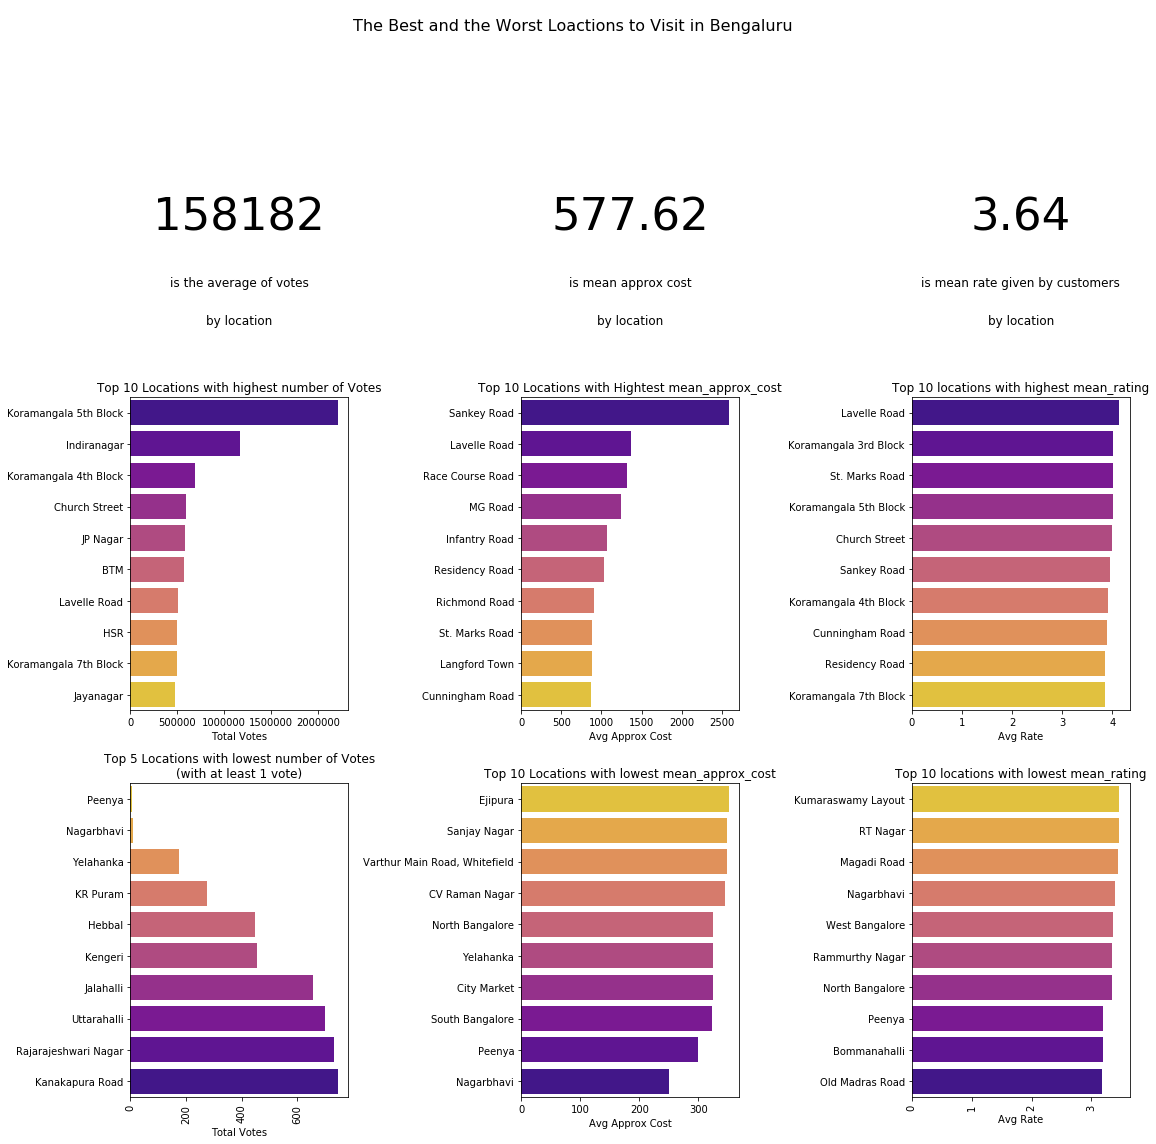

In [23]:
# Creating a figure por restaurants overview analysis
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

# Plot Pack 01 - Most popular restaurants (votes)
sns.barplot(x='total_votes', y='location', data= good_ones.sort_values(by='total_votes', ascending=False).head(10),
            ax=axs[1, 0], palette='plasma')
axs[1, 0].set_title('Top 10 Locations with highest number of Votes', size=12)
sns.barplot(x='total_votes', y='location', 
            data=good_ones.sort_values(by='total_votes', ascending= True).query('total_votes > 0').head(10),
            ax=axs[2, 0], palette='plasma_r')
axs[2, 0].set_title('Top 5 Locations with lowest number of Votes\n(with at least 1 vote)', size=12)
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Total Votes')
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, int(good_ones.total_votes.mean()), fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'by location', fontsize=12, ha='center')
axs[0, 0].axis('off')
ax.tick_params(axis='x', labelrotation=90)

# Plot Pack 02 - Cost analysis
sns.barplot(x='mean_approx_cost', y='location', data=good_ones.sort_values(by='mean_approx_cost', ascending=False).head(10),
            ax=axs[1, 1], palette='plasma')
axs[1, 1].set_title('Top 10 Locations with Hightest mean_approx_cost', size=12)
sns.barplot(x='mean_approx_cost', y='location', 
            data=good_ones.sort_values(by='mean_approx_cost', ascending=False).query('mean_approx_cost > 0').tail(10),
            ax=axs[2, 1], palette='plasma_r')
axs[2, 1].set_title('Top 10 Locations with lowest mean_approx_cost', size=12)
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Avg Approx Cost')
    ax.set_ylabel('')

# Annotations
axs[0, 1].text(0.50, 0.30, round(good_ones.mean_approx_cost.mean(), 2), fontsize=45, ha='center')
axs[0, 1].text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'by location', fontsize=12, ha='center')
axs[0, 1].axis('off')

# Plot Pack 03 - Rate analysis
sns.barplot(x='mean_rate_num', y='location', data=good_ones.sort_values(by='mean_rate_num', ascending=False).head(10),
            ax=axs[1, 2], palette='plasma')
axs[1, 2].set_title('Top 10 locations with highest mean_rating', size=12)
sns.barplot(x='mean_rate_num', y='location', 
            data=good_ones.sort_values(by='mean_rate_num', ascending=False).query('mean_rate_num > 0').tail(10),
            ax=axs[2, 2], palette='plasma_r')
axs[2, 2].set_title('Top 10 locations with lowest mean_rating', size=12)
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Avg Rate')

    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.50, 0.30, round(good_ones.mean_rate_num.mean(), 2), fontsize=45, ha='center')
axs[0, 2].text(0.50, 0.12, 'is mean rate given by customers', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'by location', fontsize=12, ha='center')
axs[0, 2].axis('off')

plt.tight_layout()
ax.tick_params(axis='x', labelrotation=90)
plt.suptitle('The Best and the Worst Loactions to Visit in Bengaluru', size=16)
plt.show()

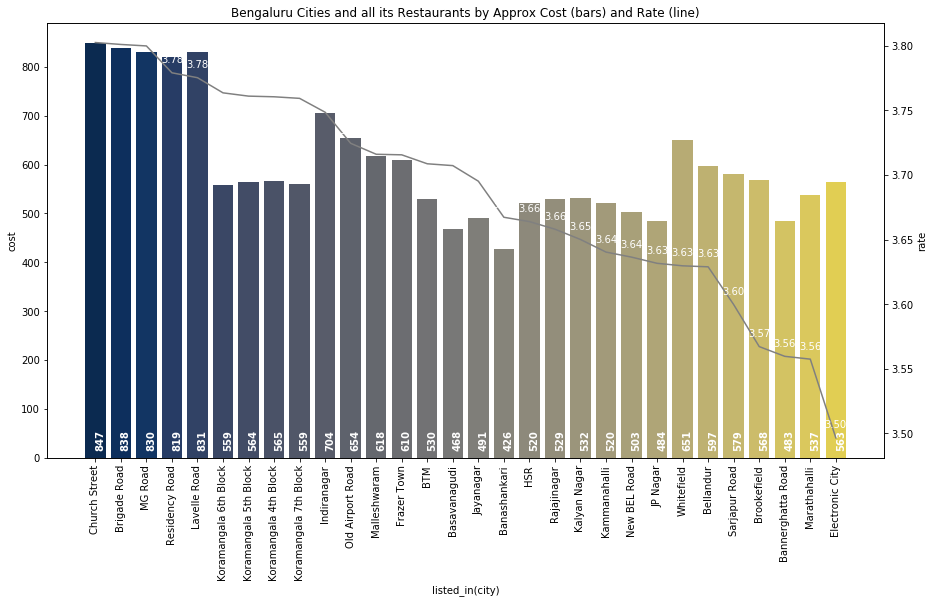

In [25]:
# Grouping data by city
city_group = df.groupby(by='listed_in(city)', as_index=False).agg({'rate': 'mean',
                                                                               'cost': 'mean'})
city_group.sort_values(by='rate', ascending=False, inplace=True)

# Ploting
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='listed_in(city)', y='cost', data=city_group, palette='cividis', 
            order=city_group['listed_in(city)'])
ax2 = ax.twinx()
sns.lineplot(x='listed_in(city)', y='rate', data=city_group, color='gray', ax=ax2, sort=False)

# Labeling line chart (rate)
xs = np.arange(0, len(city_group), 1)
ys = city_group['rate']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='white')
    
# Labeling bar chart (cost)
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{}'.format(int(y)), (x.mean(), 15), va='bottom', rotation='vertical', color='white', 
                fontweight='bold')




ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Bengaluru Cities and all its Restaurants by Approx Cost (bars) and Rate (line)')
plt.show()